# Prototyping results for deep learning

In [ ]:
import pandas as pd

lstm_mag_results = pd.read_csv('models/shl-deep-learning-prototyping-logs/shl-lstm-mag.log')
lstm_mag_results

In [ ]:
resnet_mag_results = pd.read_csv('models/shl-deep-learning-prototyping-logs/shl-resnet-mag.log')
resnet_mag_results

In [ ]:
resnet_all_results = pd.read_csv('models/shl-deep-learning-prototyping-logs/shl-resnet-all.log')
resnet_all_results

In [ ]:
lstm_all_results = pd.read_csv('models/shl-deep-learning-prototyping-logs/shl-lstm-all.log')
lstm_all_results

<Figure size 432x288 with 0 Axes>

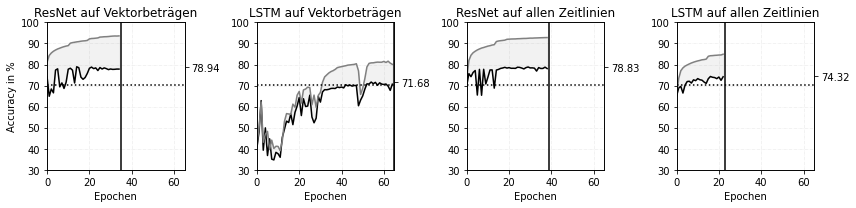

In [ ]:
import matplotlib.pyplot as plt

results = [
    ('ResNet auf Vektorbeträgen', resnet_mag_results),
    ('LSTM auf Vektorbeträgen', lstm_mag_results),
    ('ResNet auf allen Zeitlinien', resnet_all_results),
    ('LSTM auf allen Zeitlinien', lstm_all_results),
]

plt.clf()

fig, axs = plt.subplots(1, len(results), sharey=False)
fig.set_size_inches(3 * len(results), 3)

for i, (title, result_df) in enumerate(results):
    ax = axs[i]

    ax.set_title(title)
    ax.grid(
        b = True, 
        color ='grey',
        linestyle ='-.', 
        linewidth = 0.5,
        alpha = 0.2
    )
    ax.plot([acc * 100 for acc in result_df['val_acc']], color='black')
    ax.plot([acc * 100 for acc in result_df['acc']], color='grey')
    ax.fill_between(
        x=[i for i in range(len(result_df['val_acc']))],
        y1=[acc * 100 for acc in result_df['val_acc']],
        y2=[acc * 100 for acc in result_df['acc']],
        color=(0, 0, 0, 0.05)
    )
    ax.set_xlabel('Epochen')

    ax.set_ylim(30, 100)
    ax.set_xlim(0, 65)
    ax.axhline(70.42, color='black', linestyle=':')
    ax.axvline(len(result_df['acc']), color='black')

    rax = ax.twinx()
    rax.set_ylim(ax.get_ylim())
    rax.set_yticks([max([acc * 100 for acc in result_df['val_acc']])])

axs[0].set_ylabel('Accuracy in %')

plt.tight_layout()
plt.savefig(
    f'../images/shl/deep-learning-models.pdf',
    dpi=1200,
    bbox_inches='tight'
)
plt.show()